In [1]:
import pandas as pd
import torch
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split


sys.path.append("../")
from src.architectures.lstm import LSTM
from src.dataset import ExerciseDataset
from src.trainer import Trainer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.manual_seed(0)

## Joints

### Data

In [3]:
squat_joints_df = pd.read_csv("../data/joints/squat.csv")
squat_joints_df.head()

,rep,frame,x,y,z,label
0,1,0,0.005017,0.068533,0.257256,correct
1,1,0,0.007799,0.000000,0.195177,correct
2,1,0,-0.052837,0.001294,0.195874,correct
3,1,0,-0.071019,-0.016791,0.096348,correct
4,1,0,-0.067215,-0.001036,0.000939,correct


In [4]:
squat_joints_dataset = ExerciseDataset(squat_joints_df, representation="joints")
dataset_length = len(squat_joints_dataset)

In [5]:
train_joints_squat_dataset, val_joints_squat_dataset = random_split(
    squat_joints_dataset,
    [int(0.95 * dataset_length), dataset_length - int(0.95 * dataset_length)],
    generator,
)

In [28]:
batch_size = 16

train_squat_joints_dl = DataLoader(
    train_joints_squat_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

val_squat_joints_dl = DataLoader(
    val_joints_squat_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

### Parameters 

In [29]:
NUM_JOINTS = 25
NUM_ANGLES = 6

SPACE_DIM = 3
NUM_CLASSES = 5
NUM_LAYERS = 4
HIDDEN_SIZE = 128

### Model

In [30]:
joints_lstm = LSTM(NUM_JOINTS * SPACE_DIM, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES)
loss_fn = torch.nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(joints_lstm.parameters(), lr)

### Training

In [31]:
trainer = Trainer(
    joints_lstm, train_squat_joints_dl, val_squat_joints_dl, loss_fn, optimizer, device
)
results = trainer.train(num_epochs=250)

100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


2024-04-02 13:47:21,643: INFO     Epoch 1/250: Train Loss: 0.1029, Train Acc: 0.3120, Val Loss: 0.2302, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


2024-04-02 13:47:23,296: INFO     Epoch 2/250: Train Loss: 0.1028, Train Acc: 0.3120, Val Loss: 0.2301, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.60it/s]


2024-04-02 13:47:24,897: INFO     Epoch 3/250: Train Loss: 0.1028, Train Acc: 0.3120, Val Loss: 0.2300, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:47:26,611: INFO     Epoch 4/250: Train Loss: 0.1027, Train Acc: 0.3120, Val Loss: 0.2298, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:47:28,344: INFO     Epoch 5/250: Train Loss: 0.1027, Train Acc: 0.3120, Val Loss: 0.2297, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


2024-04-02 13:47:30,000: INFO     Epoch 6/250: Train Loss: 0.1025, Train Acc: 0.3120, Val Loss: 0.2294, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


2024-04-02 13:47:31,572: INFO     Epoch 7/250: Train Loss: 0.1023, Train Acc: 0.3120, Val Loss: 0.2290, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.62it/s]


2024-04-02 13:47:33,173: INFO     Epoch 8/250: Train Loss: 0.1019, Train Acc: 0.3120, Val Loss: 0.2281, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

2024-04-02 13:47:34,944: INFO     Epoch 9/250: Train Loss: 0.1012, Train Acc: 0.3120, Val Loss: 0.2268, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


2024-04-02 13:47:36,771: INFO     Epoch 10/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


2024-04-02 13:47:38,443: INFO     Epoch 11/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2271, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.69it/s]


2024-04-02 13:47:40,026: INFO     Epoch 12/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2269, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.43it/s]


2024-04-02 13:47:41,678: INFO     Epoch 13/250: Train Loss: 0.1010, Train Acc: 0.3120, Val Loss: 0.2268, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

2024-04-02 13:47:43,403: INFO     Epoch 14/250: Train Loss: 0.1008, Train Acc: 0.3120, Val Loss: 0.2269, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

2024-04-02 13:47:45,091: INFO     Epoch 15/250: Train Loss: 0.1005, Train Acc: 0.3120, Val Loss: 0.2269, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


2024-04-02 13:47:46,670: INFO     Epoch 16/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:47:48,369: INFO     Epoch 17/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.48it/s]


2024-04-02 13:47:50,008: INFO     Epoch 18/250: Train Loss: 0.1005, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

2024-04-02 13:47:51,666: INFO     Epoch 19/250: Train Loss: 0.1009, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


2024-04-02 13:47:53,279: INFO     Epoch 20/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


2024-04-02 13:47:54,894: INFO     Epoch 21/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2268, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:47:56,595: INFO     Epoch 22/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.22it/s]


2024-04-02 13:47:58,306: INFO     Epoch 23/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.36it/s]


2024-04-02 13:47:59,979: INFO     Epoch 24/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


2024-04-02 13:48:01,655: INFO     Epoch 25/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


2024-04-02 13:48:03,339: INFO     Epoch 26/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


2024-04-02 13:48:04,964: INFO     Epoch 27/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2268, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.52it/s]


2024-04-02 13:48:06,591: INFO     Epoch 28/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.30it/s]


2024-04-02 13:48:08,293: INFO     Epoch 29/250: Train Loss: 0.1007, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.45it/s]


2024-04-02 13:48:09,937: INFO     Epoch 30/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:48:11,666: INFO     Epoch 31/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2269, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.23it/s]


2024-04-02 13:48:13,125: INFO     Epoch 32/250: Train Loss: 0.1008, Train Acc: 0.3120, Val Loss: 0.2268, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.53it/s]


2024-04-02 13:48:14,523: INFO     Epoch 33/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2267, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.40it/s]


2024-04-02 13:48:15,950: INFO     Epoch 34/250: Train Loss: 0.1008, Train Acc: 0.3120, Val Loss: 0.2265, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.51it/s]


2024-04-02 13:48:17,352: INFO     Epoch 35/250: Train Loss: 0.1008, Train Acc: 0.3120, Val Loss: 0.2265, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.45it/s]


2024-04-02 13:48:18,767: INFO     Epoch 36/250: Train Loss: 0.1008, Train Acc: 0.3120, Val Loss: 0.2265, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


2024-04-02 13:48:20,416: INFO     Epoch 37/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2265, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

2024-04-02 13:48:22,120: INFO     Epoch 38/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2264, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:48:23,811: INFO     Epoch 39/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

2024-04-02 13:48:25,591: INFO     Epoch 40/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2265, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

2024-04-02 13:48:27,407: INFO     Epoch 41/250: Train Loss: 0.1006, Train Acc: 0.3120, Val Loss: 0.2261, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

2024-04-02 13:48:29,038: INFO     Epoch 42/250: Train Loss: 0.1005, Train Acc: 0.3120, Val Loss: 0.2258, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

2024-04-02 13:48:30,768: INFO     Epoch 43/250: Train Loss: 0.1002, Train Acc: 0.3120, Val Loss: 0.2257, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:48:32,469: INFO     Epoch 44/250: Train Loss: 0.1001, Train Acc: 0.3120, Val Loss: 0.2248, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:48:34,131: INFO     Epoch 45/250: Train Loss: 0.0994, Train Acc: 0.3120, Val Loss: 0.2219, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:48:35,776: INFO     Epoch 46/250: Train Loss: 0.0990, Train Acc: 0.3120, Val Loss: 0.2192, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.48it/s]


2024-04-02 13:48:37,418: INFO     Epoch 47/250: Train Loss: 0.0994, Train Acc: 0.3120, Val Loss: 0.2224, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.86it/s]


2024-04-02 13:48:38,965: INFO     Epoch 48/250: Train Loss: 0.0972, Train Acc: 0.3120, Val Loss: 0.2140, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.04it/s]


2024-04-02 13:48:40,466: INFO     Epoch 49/250: Train Loss: 0.0979, Train Acc: 0.3120, Val Loss: 0.2169, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.75it/s]


2024-04-02 13:48:42,038: INFO     Epoch 50/250: Train Loss: 0.0974, Train Acc: 0.3120, Val Loss: 0.2077, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

2024-04-02 13:48:43,625: INFO     Epoch 51/250: Train Loss: 0.0989, Train Acc: 0.3120, Val Loss: 0.2247, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


2024-04-02 13:48:45,289: INFO     Epoch 52/250: Train Loss: 0.0976, Train Acc: 0.3120, Val Loss: 0.2189, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

2024-04-02 13:48:46,900: INFO     Epoch 53/250: Train Loss: 0.0966, Train Acc: 0.3120, Val Loss: 0.2128, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.52it/s]


2024-04-02 13:48:48,528: INFO     Epoch 54/250: Train Loss: 0.0971, Train Acc: 0.3120, Val Loss: 0.2053, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


2024-04-02 13:48:50,152: INFO     Epoch 55/250: Train Loss: 0.0967, Train Acc: 0.3120, Val Loss: 0.2059, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.84it/s]


2024-04-02 13:48:51,706: INFO     Epoch 56/250: Train Loss: 0.0954, Train Acc: 0.3120, Val Loss: 0.2152, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


2024-04-02 13:48:53,383: INFO     Epoch 57/250: Train Loss: 0.0958, Train Acc: 0.3120, Val Loss: 0.2185, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

2024-04-02 13:48:54,960: INFO     Epoch 58/250: Train Loss: 0.0951, Train Acc: 0.3120, Val Loss: 0.2110, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.66it/s]


2024-04-02 13:48:56,555: INFO     Epoch 59/250: Train Loss: 0.0958, Train Acc: 0.3120, Val Loss: 0.2059, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


2024-04-02 13:48:58,120: INFO     Epoch 60/250: Train Loss: 0.0967, Train Acc: 0.3120, Val Loss: 0.2244, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

2024-04-02 13:48:59,736: INFO     Epoch 61/250: Train Loss: 0.0949, Train Acc: 0.3200, Val Loss: 0.2050, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

2024-04-02 13:49:01,350: INFO     Epoch 62/250: Train Loss: 0.0964, Train Acc: 0.3760, Val Loss: 0.2028, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  5.45it/s]


2024-04-02 13:49:02,998: INFO     Epoch 63/250: Train Loss: 0.0944, Train Acc: 0.3520, Val Loss: 0.2130, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


2024-04-02 13:49:04,586: INFO     Epoch 64/250: Train Loss: 0.0944, Train Acc: 0.3520, Val Loss: 0.2120, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.10it/s]


2024-04-02 13:49:06,404: INFO     Epoch 65/250: Train Loss: 0.0952, Train Acc: 0.3200, Val Loss: 0.2241, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


2024-04-02 13:49:08,077: INFO     Epoch 66/250: Train Loss: 0.0972, Train Acc: 0.3600, Val Loss: 0.2168, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.17it/s]


2024-04-02 13:49:09,810: INFO     Epoch 67/250: Train Loss: 0.0939, Train Acc: 0.4160, Val Loss: 0.2110, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


2024-04-02 13:49:11,592: INFO     Epoch 68/250: Train Loss: 0.0950, Train Acc: 0.3760, Val Loss: 0.2244, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

2024-04-02 13:49:13,326: INFO     Epoch 69/250: Train Loss: 0.0952, Train Acc: 0.4400, Val Loss: 0.2044, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.76it/s]


2024-04-02 13:49:15,694: INFO     Epoch 70/250: Train Loss: 0.0938, Train Acc: 0.4320, Val Loss: 0.2200, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.46it/s]


2024-04-02 13:49:17,679: INFO     Epoch 71/250: Train Loss: 0.0955, Train Acc: 0.4240, Val Loss: 0.2040, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.94it/s]


2024-04-02 13:49:19,480: INFO     Epoch 72/250: Train Loss: 0.0982, Train Acc: 0.3200, Val Loss: 0.2168, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.50it/s]


2024-04-02 13:49:21,123: INFO     Epoch 73/250: Train Loss: 0.0955, Train Acc: 0.4000, Val Loss: 0.2038, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


2024-04-02 13:49:22,786: INFO     Epoch 74/250: Train Loss: 0.0946, Train Acc: 0.4080, Val Loss: 0.2240, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.54it/s]


2024-04-02 13:49:24,412: INFO     Epoch 75/250: Train Loss: 0.0948, Train Acc: 0.3920, Val Loss: 0.2034, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


2024-04-02 13:49:26,082: INFO     Epoch 76/250: Train Loss: 0.0930, Train Acc: 0.4400, Val Loss: 0.2115, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

2024-04-02 13:49:27,860: INFO     Epoch 77/250: Train Loss: 0.0932, Train Acc: 0.4560, Val Loss: 0.2183, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:49:29,583: INFO     Epoch 78/250: Train Loss: 0.0962, Train Acc: 0.3360, Val Loss: 0.2020, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.71it/s]


2024-04-02 13:49:31,166: INFO     Epoch 79/250: Train Loss: 0.0961, Train Acc: 0.3360, Val Loss: 0.2019, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:49:32,813: INFO     Epoch 80/250: Train Loss: 0.0964, Train Acc: 0.3360, Val Loss: 0.2019, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


2024-04-02 13:49:34,487: INFO     Epoch 81/250: Train Loss: 0.0955, Train Acc: 0.3520, Val Loss: 0.2020, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:49:36,190: INFO     Epoch 82/250: Train Loss: 0.0932, Train Acc: 0.4480, Val Loss: 0.2188, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.23it/s]


2024-04-02 13:49:37,905: INFO     Epoch 83/250: Train Loss: 0.0941, Train Acc: 0.3840, Val Loss: 0.2031, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


2024-04-02 13:49:39,570: INFO     Epoch 84/250: Train Loss: 0.0926, Train Acc: 0.4480, Val Loss: 0.2172, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.36it/s]


2024-04-02 13:49:41,253: INFO     Epoch 85/250: Train Loss: 0.0923, Train Acc: 0.4560, Val Loss: 0.2167, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:49:42,982: INFO     Epoch 86/250: Train Loss: 0.0933, Train Acc: 0.4080, Val Loss: 0.2057, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.61it/s]


2024-04-02 13:49:44,593: INFO     Epoch 87/250: Train Loss: 0.0913, Train Acc: 0.4480, Val Loss: 0.2100, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

2024-04-02 13:49:46,462: INFO     Epoch 88/250: Train Loss: 0.0918, Train Acc: 0.4560, Val Loss: 0.2159, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  5.09it/s]


2024-04-02 13:49:48,219: INFO     Epoch 89/250: Train Loss: 0.0935, Train Acc: 0.3840, Val Loss: 0.2034, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:49:49,957: INFO     Epoch 90/250: Train Loss: 0.0922, Train Acc: 0.4080, Val Loss: 0.2049, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:49:51,653: INFO     Epoch 91/250: Train Loss: 0.0911, Train Acc: 0.4480, Val Loss: 0.2155, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.94it/s]


2024-04-02 13:49:53,521: INFO     Epoch 92/250: Train Loss: 0.0902, Train Acc: 0.4880, Val Loss: 0.2088, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.13it/s]


2024-04-02 13:49:55,266: INFO     Epoch 93/250: Train Loss: 0.0897, Train Acc: 0.4720, Val Loss: 0.2097, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

2024-04-02 13:49:56,949: INFO     Epoch 94/250: Train Loss: 0.0900, Train Acc: 0.4720, Val Loss: 0.2092, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:49:58,698: INFO     Epoch 95/250: Train Loss: 0.0897, Train Acc: 0.4720, Val Loss: 0.2090, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


2024-04-02 13:50:00,399: INFO     Epoch 96/250: Train Loss: 0.0898, Train Acc: 0.4720, Val Loss: 0.2086, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


2024-04-02 13:50:02,333: INFO     Epoch 97/250: Train Loss: 0.0895, Train Acc: 0.4720, Val Loss: 0.2087, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.37it/s]


2024-04-02 13:50:04,397: INFO     Epoch 98/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2085, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:50:06,165: INFO     Epoch 99/250: Train Loss: 0.0897, Train Acc: 0.4720, Val Loss: 0.2083, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.79it/s]


2024-04-02 13:50:08,022: INFO     Epoch 100/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2084, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.23it/s]


2024-04-02 13:50:10,107: INFO     Epoch 101/250: Train Loss: 0.0898, Train Acc: 0.4720, Val Loss: 0.2086, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.43it/s]


2024-04-02 13:50:12,105: INFO     Epoch 102/250: Train Loss: 0.0895, Train Acc: 0.4720, Val Loss: 0.2084, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


2024-04-02 13:50:14,389: INFO     Epoch 103/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2076, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

2024-04-02 13:50:16,269: INFO     Epoch 104/250: Train Loss: 0.0897, Train Acc: 0.4720, Val Loss: 0.2080, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.51it/s]


2024-04-02 13:50:17,912: INFO     Epoch 105/250: Train Loss: 0.0929, Train Acc: 0.4480, Val Loss: 0.2153, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.97it/s]


2024-04-02 13:50:19,716: INFO     Epoch 106/250: Train Loss: 0.0906, Train Acc: 0.4480, Val Loss: 0.2065, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:50:21,455: INFO     Epoch 107/250: Train Loss: 0.0975, Train Acc: 0.3760, Val Loss: 0.2258, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.97it/s]


2024-04-02 13:50:23,252: INFO     Epoch 108/250: Train Loss: 0.0990, Train Acc: 0.3600, Val Loss: 0.2312, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


2024-04-02 13:50:24,953: INFO     Epoch 109/250: Train Loss: 0.0944, Train Acc: 0.4080, Val Loss: 0.2230, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.26it/s]


2024-04-02 13:50:27,019: INFO     Epoch 110/250: Train Loss: 0.0901, Train Acc: 0.4640, Val Loss: 0.2081, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.84it/s]


2024-04-02 13:50:28,577: INFO     Epoch 111/250: Train Loss: 0.0908, Train Acc: 0.4640, Val Loss: 0.2163, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


2024-04-02 13:50:30,325: INFO     Epoch 112/250: Train Loss: 0.0897, Train Acc: 0.4640, Val Loss: 0.2084, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:50:32,097: INFO     Epoch 113/250: Train Loss: 0.0894, Train Acc: 0.4720, Val Loss: 0.2082, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


2024-04-02 13:50:33,846: INFO     Epoch 114/250: Train Loss: 0.0898, Train Acc: 0.4640, Val Loss: 0.2086, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.90it/s]


2024-04-02 13:50:35,666: INFO     Epoch 115/250: Train Loss: 0.0907, Train Acc: 0.4640, Val Loss: 0.2167, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

2024-04-02 13:50:37,381: INFO     Epoch 116/250: Train Loss: 0.0899, Train Acc: 0.4640, Val Loss: 0.2165, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.48it/s]


2024-04-02 13:50:39,024: INFO     Epoch 117/250: Train Loss: 0.0904, Train Acc: 0.4560, Val Loss: 0.2064, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.74it/s]


2024-04-02 13:50:40,604: INFO     Epoch 118/250: Train Loss: 0.0900, Train Acc: 0.4640, Val Loss: 0.2163, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:50:42,340: INFO     Epoch 119/250: Train Loss: 0.0970, Train Acc: 0.3760, Val Loss: 0.2266, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


2024-04-02 13:50:44,171: INFO     Epoch 120/250: Train Loss: 0.0962, Train Acc: 0.3360, Val Loss: 0.2049, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.36it/s]


2024-04-02 13:50:45,852: INFO     Epoch 121/250: Train Loss: 0.1026, Train Acc: 0.2240, Val Loss: 0.2232, Val Acc: 0.1429


100%|██████████| 8/8 [00:01<00:00,  5.09it/s]


2024-04-02 13:50:47,633: INFO     Epoch 122/250: Train Loss: 0.1041, Train Acc: 0.2000, Val Loss: 0.2226, Val Acc: 0.1429


100%|██████████| 8/8 [00:01<00:00,  5.20it/s]


2024-04-02 13:50:49,360: INFO     Epoch 123/250: Train Loss: 0.0964, Train Acc: 0.3360, Val Loss: 0.2034, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:50:51,114: INFO     Epoch 124/250: Train Loss: 0.0897, Train Acc: 0.4720, Val Loss: 0.2147, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.82it/s]


2024-04-02 13:50:52,957: INFO     Epoch 125/250: Train Loss: 0.0903, Train Acc: 0.4800, Val Loss: 0.2151, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:50:54,648: INFO     Epoch 126/250: Train Loss: 0.0892, Train Acc: 0.4720, Val Loss: 0.2059, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:50:56,380: INFO     Epoch 127/250: Train Loss: 0.0892, Train Acc: 0.4800, Val Loss: 0.2104, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

2024-04-02 13:50:58,158: INFO     Epoch 128/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2060, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.97it/s]


2024-04-02 13:50:59,952: INFO     Epoch 129/250: Train Loss: 0.0902, Train Acc: 0.4560, Val Loss: 0.2044, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

2024-04-02 13:51:01,688: INFO     Epoch 130/250: Train Loss: 0.0893, Train Acc: 0.4640, Val Loss: 0.2058, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


2024-04-02 13:51:03,269: INFO     Epoch 131/250: Train Loss: 0.0890, Train Acc: 0.4800, Val Loss: 0.2138, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.13it/s]


2024-04-02 13:51:05,013: INFO     Epoch 132/250: Train Loss: 0.0892, Train Acc: 0.4800, Val Loss: 0.2140, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:51:06,768: INFO     Epoch 133/250: Train Loss: 0.0890, Train Acc: 0.4720, Val Loss: 0.2061, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

2024-04-02 13:51:08,482: INFO     Epoch 134/250: Train Loss: 0.0905, Train Acc: 0.4720, Val Loss: 0.2156, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:51:10,154: INFO     Epoch 135/250: Train Loss: 0.0921, Train Acc: 0.4320, Val Loss: 0.2156, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


2024-04-02 13:51:11,943: INFO     Epoch 136/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2064, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


2024-04-02 13:51:13,641: INFO     Epoch 137/250: Train Loss: 0.0904, Train Acc: 0.4480, Val Loss: 0.2030, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.22it/s]


2024-04-02 13:51:15,363: INFO     Epoch 138/250: Train Loss: 0.0898, Train Acc: 0.4640, Val Loss: 0.2156, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.09it/s]


2024-04-02 13:51:17,125: INFO     Epoch 139/250: Train Loss: 0.0895, Train Acc: 0.4640, Val Loss: 0.2158, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.98it/s]


2024-04-02 13:51:18,916: INFO     Epoch 140/250: Train Loss: 0.0901, Train Acc: 0.4560, Val Loss: 0.2033, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.22it/s]


2024-04-02 13:51:20,634: INFO     Epoch 141/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2069, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


2024-04-02 13:51:22,259: INFO     Epoch 142/250: Train Loss: 0.0892, Train Acc: 0.4720, Val Loss: 0.2064, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.26it/s]


2024-04-02 13:51:23,970: INFO     Epoch 143/250: Train Loss: 0.0889, Train Acc: 0.4720, Val Loss: 0.2062, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


2024-04-02 13:51:25,639: INFO     Epoch 144/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2067, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


2024-04-02 13:51:27,320: INFO     Epoch 145/250: Train Loss: 0.0892, Train Acc: 0.4720, Val Loss: 0.2155, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


2024-04-02 13:51:29,017: INFO     Epoch 146/250: Train Loss: 0.0905, Train Acc: 0.4720, Val Loss: 0.2157, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.95it/s]


2024-04-02 13:51:30,822: INFO     Epoch 147/250: Train Loss: 0.0949, Train Acc: 0.4160, Val Loss: 0.2149, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:51:32,542: INFO     Epoch 148/250: Train Loss: 0.0958, Train Acc: 0.3920, Val Loss: 0.2245, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:51:34,285: INFO     Epoch 149/250: Train Loss: 0.0896, Train Acc: 0.4640, Val Loss: 0.2162, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:51:35,938: INFO     Epoch 150/250: Train Loss: 0.0899, Train Acc: 0.4560, Val Loss: 0.2051, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.96it/s]


2024-04-02 13:51:37,740: INFO     Epoch 151/250: Train Loss: 0.0922, Train Acc: 0.4240, Val Loss: 0.2163, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.51it/s]


2024-04-02 13:51:39,698: INFO     Epoch 152/250: Train Loss: 0.0909, Train Acc: 0.4720, Val Loss: 0.2163, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.95it/s]


2024-04-02 13:51:41,498: INFO     Epoch 153/250: Train Loss: 0.0913, Train Acc: 0.4240, Val Loss: 0.2064, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:51:43,228: INFO     Epoch 154/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2078, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:51:44,969: INFO     Epoch 155/250: Train Loss: 0.0896, Train Acc: 0.4720, Val Loss: 0.2164, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:51:46,643: INFO     Epoch 156/250: Train Loss: 0.0893, Train Acc: 0.4640, Val Loss: 0.2101, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:51:48,382: INFO     Epoch 157/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2064, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:51:50,108: INFO     Epoch 158/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2062, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


2024-04-02 13:51:51,801: INFO     Epoch 159/250: Train Loss: 0.0890, Train Acc: 0.4720, Val Loss: 0.2064, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:51:53,531: INFO     Epoch 160/250: Train Loss: 0.0890, Train Acc: 0.4720, Val Loss: 0.2062, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.77it/s]


2024-04-02 13:51:55,112: INFO     Epoch 161/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2064, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.18it/s]


2024-04-02 13:51:57,216: INFO     Epoch 162/250: Train Loss: 0.0890, Train Acc: 0.4640, Val Loss: 0.2059, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

2024-04-02 13:51:59,328: INFO     Epoch 163/250: Train Loss: 0.0889, Train Acc: 0.4720, Val Loss: 0.2059, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.14it/s]


2024-04-02 13:52:01,454: INFO     Epoch 164/250: Train Loss: 0.0903, Train Acc: 0.4720, Val Loss: 0.2155, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

2024-04-02 13:52:03,431: INFO     Epoch 165/250: Train Loss: 0.0891, Train Acc: 0.4800, Val Loss: 0.2099, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


2024-04-02 13:52:05,538: INFO     Epoch 166/250: Train Loss: 0.0888, Train Acc: 0.4720, Val Loss: 0.2060, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

2024-04-02 13:52:07,767: INFO     Epoch 167/250: Train Loss: 0.0892, Train Acc: 0.4720, Val Loss: 0.2057, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

2024-04-02 13:52:10,165: INFO     Epoch 168/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2057, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.81it/s]


2024-04-02 13:52:12,456: INFO     Epoch 169/250: Train Loss: 0.0892, Train Acc: 0.4720, Val Loss: 0.2061, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

2024-04-02 13:52:14,710: INFO     Epoch 170/250: Train Loss: 0.0891, Train Acc: 0.4640, Val Loss: 0.2057, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.05it/s]


2024-04-02 13:52:16,878: INFO     Epoch 171/250: Train Loss: 0.0892, Train Acc: 0.4880, Val Loss: 0.2112, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

2024-04-02 13:52:18,974: INFO     Epoch 172/250: Train Loss: 0.0892, Train Acc: 0.4880, Val Loss: 0.2140, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.02it/s]


2024-04-02 13:52:21,158: INFO     Epoch 173/250: Train Loss: 0.0889, Train Acc: 0.4800, Val Loss: 0.2055, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


2024-04-02 13:52:23,234: INFO     Epoch 174/250: Train Loss: 0.0893, Train Acc: 0.4880, Val Loss: 0.2056, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


2024-04-02 13:52:25,337: INFO     Epoch 175/250: Train Loss: 0.0888, Train Acc: 0.4640, Val Loss: 0.2057, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.93it/s]


2024-04-02 13:52:27,680: INFO     Epoch 176/250: Train Loss: 0.0890, Train Acc: 0.4800, Val Loss: 0.2053, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

2024-04-02 13:52:29,758: INFO     Epoch 177/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2117, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.93it/s]


2024-04-02 13:52:31,988: INFO     Epoch 178/250: Train Loss: 0.0893, Train Acc: 0.4800, Val Loss: 0.2106, Val Acc: 0.2857


100%|██████████| 8/8 [00:02<00:00,  3.87it/s]


2024-04-02 13:52:34,261: INFO     Epoch 179/250: Train Loss: 0.0892, Train Acc: 0.4800, Val Loss: 0.2056, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.99it/s]


2024-04-02 13:52:36,463: INFO     Epoch 180/250: Train Loss: 0.0887, Train Acc: 0.4880, Val Loss: 0.2051, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


2024-04-02 13:52:38,707: INFO     Epoch 181/250: Train Loss: 0.0888, Train Acc: 0.5120, Val Loss: 0.2051, Val Acc: 0.5714


100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


2024-04-02 13:52:40,929: INFO     Epoch 182/250: Train Loss: 0.0891, Train Acc: 0.4800, Val Loss: 0.2045, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.29it/s]


2024-04-02 13:52:42,991: INFO     Epoch 183/250: Train Loss: 0.0892, Train Acc: 0.4800, Val Loss: 0.2041, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

2024-04-02 13:52:44,994: INFO     Epoch 184/250: Train Loss: 0.0889, Train Acc: 0.4880, Val Loss: 0.2049, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.15it/s]


2024-04-02 13:52:47,140: INFO     Epoch 185/250: Train Loss: 0.0892, Train Acc: 0.4640, Val Loss: 0.2121, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.13it/s]


2024-04-02 13:52:49,271: INFO     Epoch 186/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2135, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.57it/s]

2024-04-02 13:52:51,212: INFO     Epoch 187/250: Train Loss: 0.0892, Train Acc: 0.4880, Val Loss: 0.2050, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.95it/s]


2024-04-02 13:52:53,427: INFO     Epoch 188/250: Train Loss: 0.0891, Train Acc: 0.4880, Val Loss: 0.2050, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

2024-04-02 13:52:55,710: INFO     Epoch 189/250: Train Loss: 0.0893, Train Acc: 0.4800, Val Loss: 0.2052, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.91it/s]


2024-04-02 13:52:57,947: INFO     Epoch 190/250: Train Loss: 0.0891, Train Acc: 0.4800, Val Loss: 0.2051, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.03it/s]


2024-04-02 13:53:00,119: INFO     Epoch 191/250: Train Loss: 0.0887, Train Acc: 0.4720, Val Loss: 0.2043, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.15it/s]


2024-04-02 13:53:02,242: INFO     Epoch 192/250: Train Loss: 0.0889, Train Acc: 0.4640, Val Loss: 0.2045, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  4.00it/s]


2024-04-02 13:53:04,432: INFO     Epoch 193/250: Train Loss: 0.0890, Train Acc: 0.4800, Val Loss: 0.2068, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

2024-04-02 13:53:06,632: INFO     Epoch 194/250: Train Loss: 0.0890, Train Acc: 0.4880, Val Loss: 0.2136, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.28it/s]


2024-04-02 13:53:08,688: INFO     Epoch 195/250: Train Loss: 0.0888, Train Acc: 0.4640, Val Loss: 0.2051, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.53it/s]

2024-04-02 13:53:10,646: INFO     Epoch 196/250: Train Loss: 0.0891, Train Acc: 0.4720, Val Loss: 0.2028, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

2024-04-02 13:53:12,756: INFO     Epoch 197/250: Train Loss: 0.0890, Train Acc: 0.4720, Val Loss: 0.2046, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


2024-04-02 13:53:14,860: INFO     Epoch 198/250: Train Loss: 0.0891, Train Acc: 0.4640, Val Loss: 0.2047, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

2024-04-02 13:53:17,037: INFO     Epoch 199/250: Train Loss: 0.0894, Train Acc: 0.4800, Val Loss: 0.2132, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.97it/s]


2024-04-02 13:53:19,274: INFO     Epoch 200/250: Train Loss: 0.0891, Train Acc: 0.4640, Val Loss: 0.2034, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.16it/s]


2024-04-02 13:53:21,397: INFO     Epoch 201/250: Train Loss: 0.0897, Train Acc: 0.4640, Val Loss: 0.2003, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

2024-04-02 13:53:23,421: INFO     Epoch 202/250: Train Loss: 0.0892, Train Acc: 0.4800, Val Loss: 0.2054, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

2024-04-02 13:53:25,618: INFO     Epoch 203/250: Train Loss: 0.0886, Train Acc: 0.4800, Val Loss: 0.2048, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

2024-04-02 13:53:27,969: INFO     Epoch 204/250: Train Loss: 0.0889, Train Acc: 0.4880, Val Loss: 0.2019, Val Acc: 0.5714



100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


2024-04-02 13:53:30,265: INFO     Epoch 205/250: Train Loss: 0.0887, Train Acc: 0.4720, Val Loss: 0.2000, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

2024-04-02 13:53:32,281: INFO     Epoch 206/250: Train Loss: 0.0890, Train Acc: 0.4720, Val Loss: 0.1996, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.04it/s]


2024-04-02 13:53:34,471: INFO     Epoch 207/250: Train Loss: 0.0890, Train Acc: 0.4800, Val Loss: 0.1988, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


2024-04-02 13:53:36,570: INFO     Epoch 208/250: Train Loss: 0.0888, Train Acc: 0.4880, Val Loss: 0.2046, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

2024-04-02 13:53:38,733: INFO     Epoch 209/250: Train Loss: 0.0898, Train Acc: 0.4560, Val Loss: 0.2149, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

2024-04-02 13:53:40,966: INFO     Epoch 210/250: Train Loss: 0.0895, Train Acc: 0.4880, Val Loss: 0.2139, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

2024-04-02 13:53:43,188: INFO     Epoch 211/250: Train Loss: 0.0887, Train Acc: 0.4800, Val Loss: 0.2011, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.67it/s]


2024-04-02 13:53:45,569: INFO     Epoch 212/250: Train Loss: 0.0898, Train Acc: 0.4720, Val Loss: 0.1952, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.10it/s]


2024-04-02 13:53:47,714: INFO     Epoch 213/250: Train Loss: 0.0894, Train Acc: 0.4880, Val Loss: 0.2131, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.33it/s]


2024-04-02 13:53:49,757: INFO     Epoch 214/250: Train Loss: 0.0892, Train Acc: 0.4880, Val Loss: 0.2057, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

2024-04-02 13:53:52,070: INFO     Epoch 215/250: Train Loss: 0.0884, Train Acc: 0.4640, Val Loss: 0.1972, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

2024-04-02 13:53:54,310: INFO     Epoch 216/250: Train Loss: 0.0883, Train Acc: 0.4720, Val Loss: 0.1999, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

2024-04-02 13:53:56,647: INFO     Epoch 217/250: Train Loss: 0.0888, Train Acc: 0.4640, Val Loss: 0.2006, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

2024-04-02 13:53:58,946: INFO     Epoch 218/250: Train Loss: 0.0889, Train Acc: 0.4720, Val Loss: 0.1950, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


2024-04-02 13:54:01,157: INFO     Epoch 219/250: Train Loss: 0.0893, Train Acc: 0.4480, Val Loss: 0.2134, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.20it/s]


2024-04-02 13:54:03,263: INFO     Epoch 220/250: Train Loss: 0.0904, Train Acc: 0.4480, Val Loss: 0.1962, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.34it/s]

2024-04-02 13:54:05,291: INFO     Epoch 221/250: Train Loss: 0.0953, Train Acc: 0.3600, Val Loss: 0.2033, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.22it/s]


2024-04-02 13:54:07,376: INFO     Epoch 222/250: Train Loss: 0.0884, Train Acc: 0.4720, Val Loss: 0.1998, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  4.20it/s]


2024-04-02 13:54:09,467: INFO     Epoch 223/250: Train Loss: 0.0903, Train Acc: 0.4560, Val Loss: 0.2150, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.02it/s]


2024-04-02 13:54:11,648: INFO     Epoch 224/250: Train Loss: 0.0902, Train Acc: 0.4320, Val Loss: 0.2149, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

2024-04-02 13:54:13,791: INFO     Epoch 225/250: Train Loss: 0.0897, Train Acc: 0.4560, Val Loss: 0.2024, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

2024-04-02 13:54:16,002: INFO     Epoch 226/250: Train Loss: 0.0886, Train Acc: 0.4800, Val Loss: 0.2019, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

2024-04-02 13:54:18,096: INFO     Epoch 227/250: Train Loss: 0.0898, Train Acc: 0.4240, Val Loss: 0.2150, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

2024-04-02 13:54:20,305: INFO     Epoch 228/250: Train Loss: 0.0888, Train Acc: 0.4800, Val Loss: 0.2052, Val Acc: 0.4286



100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

2024-04-02 13:54:22,516: INFO     Epoch 229/250: Train Loss: 0.0885, Train Acc: 0.4640, Val Loss: 0.1993, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.01it/s]

2024-04-02 13:54:24,704: INFO     Epoch 230/250: Train Loss: 0.0886, Train Acc: 0.4800, Val Loss: 0.2030, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

2024-04-02 13:54:26,804: INFO     Epoch 231/250: Train Loss: 0.0893, Train Acc: 0.4720, Val Loss: 0.2130, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.21it/s]


2024-04-02 13:54:28,894: INFO     Epoch 232/250: Train Loss: 0.0891, Train Acc: 0.4880, Val Loss: 0.2072, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.59it/s]


2024-04-02 13:54:30,825: INFO     Epoch 233/250: Train Loss: 0.0887, Train Acc: 0.4640, Val Loss: 0.1960, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.77it/s]


2024-04-02 13:54:33,177: INFO     Epoch 234/250: Train Loss: 0.0885, Train Acc: 0.4640, Val Loss: 0.1989, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

2024-04-02 13:54:35,313: INFO     Epoch 235/250: Train Loss: 0.0887, Train Acc: 0.4720, Val Loss: 0.2029, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

2024-04-02 13:54:37,470: INFO     Epoch 236/250: Train Loss: 0.0881, Train Acc: 0.4880, Val Loss: 0.1988, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  4.06it/s]


2024-04-02 13:54:39,635: INFO     Epoch 237/250: Train Loss: 0.0880, Train Acc: 0.4880, Val Loss: 0.1975, Val Acc: 0.4286


100%|██████████| 8/8 [00:02<00:00,  3.12it/s]


2024-04-02 13:54:42,418: INFO     Epoch 238/250: Train Loss: 0.0881, Train Acc: 0.5280, Val Loss: 0.1919, Val Acc: 0.7143


100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

2024-04-02 13:54:44,877: INFO     Epoch 239/250: Train Loss: 0.0876, Train Acc: 0.4960, Val Loss: 0.1929, Val Acc: 0.7143



100%|██████████| 8/8 [00:02<00:00,  3.60it/s]


2024-04-02 13:54:47,314: INFO     Epoch 240/250: Train Loss: 0.0874, Train Acc: 0.4960, Val Loss: 0.1936, Val Acc: 0.7143


100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


2024-04-02 13:54:49,979: INFO     Epoch 241/250: Train Loss: 0.0871, Train Acc: 0.5120, Val Loss: 0.1890, Val Acc: 0.5714


100%|██████████| 8/8 [00:02<00:00,  3.67it/s]


2024-04-02 13:54:52,380: INFO     Epoch 242/250: Train Loss: 0.0871, Train Acc: 0.5120, Val Loss: 0.1891, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  4.44it/s]


2024-04-02 13:54:54,378: INFO     Epoch 243/250: Train Loss: 0.0902, Train Acc: 0.4160, Val Loss: 0.2142, Val Acc: 0.2857


100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

2024-04-02 13:54:56,682: INFO     Epoch 244/250: Train Loss: 0.0900, Train Acc: 0.4160, Val Loss: 0.2141, Val Acc: 0.2857



100%|██████████| 8/8 [00:02<00:00,  3.39it/s]


2024-04-02 13:54:59,266: INFO     Epoch 245/250: Train Loss: 0.0884, Train Acc: 0.4720, Val Loss: 0.1886, Val Acc: 0.5714


100%|██████████| 8/8 [00:02<00:00,  3.92it/s]


2024-04-02 13:55:01,517: INFO     Epoch 246/250: Train Loss: 0.0897, Train Acc: 0.4160, Val Loss: 0.2139, Val Acc: 0.2857


100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


2024-04-02 13:55:03,844: INFO     Epoch 247/250: Train Loss: 0.0987, Train Acc: 0.3680, Val Loss: 0.2310, Val Acc: 0.2857


100%|██████████| 8/8 [00:02<00:00,  3.52it/s]


2024-04-02 13:55:06,320: INFO     Epoch 248/250: Train Loss: 0.0993, Train Acc: 0.3600, Val Loss: 0.2311, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

2024-04-02 13:55:08,482: INFO     Epoch 249/250: Train Loss: 0.0983, Train Acc: 0.3520, Val Loss: 0.2280, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  4.67it/s]

2024-04-02 13:55:10,385: INFO     Epoch 250/250: Train Loss: 0.0919, Train Acc: 0.4400, Val Loss: 0.2142, Val Acc: 0.4286


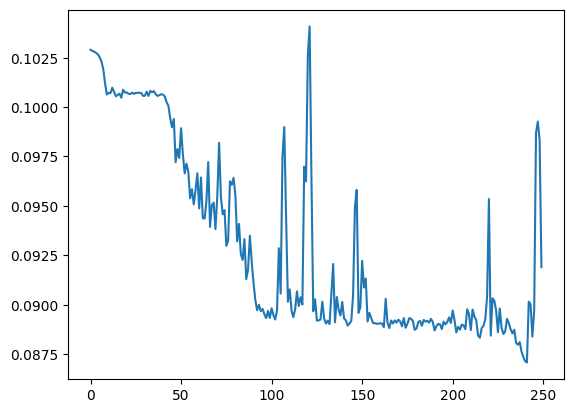

In [34]:
plt.plot([result["train_loss"] for result in results], label="train acc")

Output values looks very uninteresting, that's probably because of how many features (75) were used as input and how many samples are in dataset (132).

## Angles

In [11]:
squat_angles_df = pd.read_csv("../data/angles/squat.csv")
squat_angles_df.head()

,rep,frame,left_knee,right_knee,left_hip,right_hip,label
0,1,0,167.455608,172.221420,175.869505,174.656520,correct
1,1,1,165.422781,170.596107,174.906872,175.458800,correct
2,1,2,162.825017,168.208123,172.839533,175.276172,correct
3,1,3,159.607962,165.029685,169.860558,173.482732,correct
4,1,4,155.860505,161.165659,166.194988,170.643770,correct


In [12]:
squat_angles_dataset = ExerciseDataset(squat_angles_df, representation="angles")

In [13]:
train_squat_angles_dataset, val_squat_angles_dataset = random_split(
    squat_angles_dataset,
    [int(0.95 * dataset_length), dataset_length - int(0.95 * dataset_length)],
    generator,
)

In [20]:
batch_size = 16

train_squat_angles_dl = DataLoader(
    train_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

val_squat_angles_dl = DataLoader(
    val_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

In [21]:
angles_lstm = LSTM(4, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES)
loss_fn = torch.nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(angles_lstm.parameters(), lr)

In [24]:
trainer = Trainer(
    angles_lstm, train_squat_angles_dl, val_squat_angles_dl, loss_fn, optimizer, device
)
results = trainer.train(num_epochs=250)

100%|██████████| 8/8 [00:01<00:00,  5.74it/s]


2024-04-02 13:36:24,318: INFO     Epoch 1/250: Train Loss: 0.0836, Train Acc: 0.6160, Val Loss: 0.2177, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.23it/s]

2024-04-02 13:36:25,790: INFO     Epoch 2/250: Train Loss: 0.0800, Train Acc: 0.6560, Val Loss: 0.1907, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  6.39it/s]

2024-04-02 13:36:27,232: INFO     Epoch 3/250: Train Loss: 0.0795, Train Acc: 0.6720, Val Loss: 0.2082, Val Acc: 0.4286



100%|██████████| 8/8 [00:01<00:00,  6.11it/s]


2024-04-02 13:36:28,733: INFO     Epoch 4/250: Train Loss: 0.0802, Train Acc: 0.6480, Val Loss: 0.2059, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  6.65it/s]


2024-04-02 13:36:30,129: INFO     Epoch 5/250: Train Loss: 0.0837, Train Acc: 0.5920, Val Loss: 0.1710, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.27it/s]


2024-04-02 13:36:31,593: INFO     Epoch 6/250: Train Loss: 0.0851, Train Acc: 0.5760, Val Loss: 0.1909, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.26it/s]


2024-04-02 13:36:33,061: INFO     Epoch 7/250: Train Loss: 0.0844, Train Acc: 0.5920, Val Loss: 0.2003, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


2024-04-02 13:36:35,000: INFO     Epoch 8/250: Train Loss: 0.0808, Train Acc: 0.6560, Val Loss: 0.2397, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  5.74it/s]


2024-04-02 13:36:36,603: INFO     Epoch 9/250: Train Loss: 0.0805, Train Acc: 0.6400, Val Loss: 0.1733, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.05it/s]


2024-04-02 13:36:38,115: INFO     Epoch 10/250: Train Loss: 0.0782, Train Acc: 0.6800, Val Loss: 0.2170, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  4.88it/s]


2024-04-02 13:36:39,945: INFO     Epoch 11/250: Train Loss: 0.0843, Train Acc: 0.6000, Val Loss: 0.1736, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

2024-04-02 13:36:41,411: INFO     Epoch 12/250: Train Loss: 0.0815, Train Acc: 0.6160, Val Loss: 0.1675, Val Acc: 0.7143



100%|██████████| 8/8 [00:01<00:00,  6.48it/s]


2024-04-02 13:36:42,835: INFO     Epoch 13/250: Train Loss: 0.0814, Train Acc: 0.6320, Val Loss: 0.1801, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.34it/s]


2024-04-02 13:36:44,287: INFO     Epoch 14/250: Train Loss: 0.0779, Train Acc: 0.7040, Val Loss: 0.1950, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.24it/s]


2024-04-02 13:36:45,757: INFO     Epoch 15/250: Train Loss: 0.0802, Train Acc: 0.6480, Val Loss: 0.1701, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.24it/s]


2024-04-02 13:36:47,230: INFO     Epoch 16/250: Train Loss: 0.0803, Train Acc: 0.6480, Val Loss: 0.1693, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.10it/s]


2024-04-02 13:36:48,731: INFO     Epoch 17/250: Train Loss: 0.0798, Train Acc: 0.6560, Val Loss: 0.1694, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.33it/s]


2024-04-02 13:36:50,185: INFO     Epoch 18/250: Train Loss: 0.0782, Train Acc: 0.6960, Val Loss: 0.1798, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.29it/s]


2024-04-02 13:36:51,646: INFO     Epoch 19/250: Train Loss: 0.0803, Train Acc: 0.6400, Val Loss: 0.2342, Val Acc: 0.1429


100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


2024-04-02 13:36:53,156: INFO     Epoch 20/250: Train Loss: 0.0817, Train Acc: 0.6320, Val Loss: 0.1676, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.14it/s]


2024-04-02 13:36:54,650: INFO     Epoch 21/250: Train Loss: 0.0808, Train Acc: 0.6400, Val Loss: 0.1723, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.23it/s]


2024-04-02 13:36:56,121: INFO     Epoch 22/250: Train Loss: 0.0816, Train Acc: 0.6240, Val Loss: 0.1917, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

2024-04-02 13:36:57,520: INFO     Epoch 23/250: Train Loss: 0.0822, Train Acc: 0.6240, Val Loss: 0.2284, Val Acc: 0.2857



100%|██████████| 8/8 [00:01<00:00,  6.26it/s]


2024-04-02 13:36:58,991: INFO     Epoch 24/250: Train Loss: 0.0798, Train Acc: 0.6640, Val Loss: 0.2075, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  6.29it/s]


2024-04-02 13:37:00,454: INFO     Epoch 25/250: Train Loss: 0.0758, Train Acc: 0.7280, Val Loss: 0.1870, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.60it/s]


2024-04-02 13:37:01,856: INFO     Epoch 26/250: Train Loss: 0.0738, Train Acc: 0.7600, Val Loss: 0.1678, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.38it/s]


2024-04-02 13:37:03,325: INFO     Epoch 27/250: Train Loss: 0.0743, Train Acc: 0.7680, Val Loss: 0.1644, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  6.22it/s]


2024-04-02 13:37:04,804: INFO     Epoch 28/250: Train Loss: 0.0736, Train Acc: 0.7520, Val Loss: 0.1701, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.49it/s]


2024-04-02 13:37:06,228: INFO     Epoch 29/250: Train Loss: 0.0738, Train Acc: 0.7680, Val Loss: 0.1881, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.23it/s]

2024-04-02 13:37:07,702: INFO     Epoch 30/250: Train Loss: 0.0738, Train Acc: 0.7760, Val Loss: 0.1650, Val Acc: 0.7143



100%|██████████| 8/8 [00:01<00:00,  6.27it/s]


2024-04-02 13:37:09,166: INFO     Epoch 31/250: Train Loss: 0.0717, Train Acc: 0.7920, Val Loss: 0.1749, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.17it/s]


2024-04-02 13:37:10,656: INFO     Epoch 32/250: Train Loss: 0.0749, Train Acc: 0.7440, Val Loss: 0.1608, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.19it/s]


2024-04-02 13:37:12,138: INFO     Epoch 33/250: Train Loss: 0.0772, Train Acc: 0.6880, Val Loss: 0.1658, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  6.24it/s]


2024-04-02 13:37:13,613: INFO     Epoch 34/250: Train Loss: 0.0729, Train Acc: 0.7920, Val Loss: 0.1815, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  6.30it/s]


2024-04-02 13:37:15,073: INFO     Epoch 35/250: Train Loss: 0.0741, Train Acc: 0.7520, Val Loss: 0.1584, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  6.19it/s]


2024-04-02 13:37:16,555: INFO     Epoch 36/250: Train Loss: 0.0746, Train Acc: 0.7440, Val Loss: 0.2141, Val Acc: 0.2857


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


2024-04-02 13:37:17,934: INFO     Epoch 37/250: Train Loss: 0.0700, Train Acc: 0.8480, Val Loss: 0.1708, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.71it/s]


2024-04-02 13:37:19,527: INFO     Epoch 38/250: Train Loss: 0.0702, Train Acc: 0.8240, Val Loss: 0.1698, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


2024-04-02 13:37:21,141: INFO     Epoch 39/250: Train Loss: 0.0695, Train Acc: 0.8400, Val Loss: 0.1742, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.10it/s]


2024-04-02 13:37:22,903: INFO     Epoch 40/250: Train Loss: 0.0699, Train Acc: 0.8240, Val Loss: 0.1674, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.49it/s]


2024-04-02 13:37:24,558: INFO     Epoch 41/250: Train Loss: 0.0688, Train Acc: 0.8560, Val Loss: 0.1662, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

2024-04-02 13:37:26,304: INFO     Epoch 42/250: Train Loss: 0.0717, Train Acc: 0.8000, Val Loss: 0.1918, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  5.24it/s]


2024-04-02 13:37:28,027: INFO     Epoch 43/250: Train Loss: 0.0706, Train Acc: 0.8160, Val Loss: 0.1681, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:37:29,787: INFO     Epoch 44/250: Train Loss: 0.0707, Train Acc: 0.8000, Val Loss: 0.1563, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


2024-04-02 13:37:31,457: INFO     Epoch 45/250: Train Loss: 0.0687, Train Acc: 0.8480, Val Loss: 0.1869, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:37:33,209: INFO     Epoch 46/250: Train Loss: 0.0686, Train Acc: 0.8480, Val Loss: 0.1537, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


2024-04-02 13:37:34,852: INFO     Epoch 47/250: Train Loss: 0.0702, Train Acc: 0.8160, Val Loss: 0.1766, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  4.91it/s]


2024-04-02 13:37:36,682: INFO     Epoch 48/250: Train Loss: 0.0693, Train Acc: 0.8400, Val Loss: 0.1515, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:37:38,402: INFO     Epoch 49/250: Train Loss: 0.0698, Train Acc: 0.8160, Val Loss: 0.1534, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


2024-04-02 13:37:40,176: INFO     Epoch 50/250: Train Loss: 0.0698, Train Acc: 0.8240, Val Loss: 0.1586, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:37:41,924: INFO     Epoch 51/250: Train Loss: 0.0684, Train Acc: 0.8400, Val Loss: 0.1701, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:37:43,674: INFO     Epoch 52/250: Train Loss: 0.0697, Train Acc: 0.8320, Val Loss: 0.1830, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.39it/s]


2024-04-02 13:37:45,355: INFO     Epoch 53/250: Train Loss: 0.0663, Train Acc: 0.8880, Val Loss: 0.1681, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

2024-04-02 13:37:47,122: INFO     Epoch 54/250: Train Loss: 0.0664, Train Acc: 0.8800, Val Loss: 0.1667, Val Acc: 0.7143



100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

2024-04-02 13:37:48,841: INFO     Epoch 55/250: Train Loss: 0.0689, Train Acc: 0.8240, Val Loss: 0.1852, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:37:50,607: INFO     Epoch 56/250: Train Loss: 0.0695, Train Acc: 0.8160, Val Loss: 0.1679, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.02it/s]


2024-04-02 13:37:52,406: INFO     Epoch 57/250: Train Loss: 0.0698, Train Acc: 0.8240, Val Loss: 0.1509, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.03it/s]


2024-04-02 13:37:54,192: INFO     Epoch 58/250: Train Loss: 0.0731, Train Acc: 0.7600, Val Loss: 0.1943, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.54it/s]


2024-04-02 13:37:55,833: INFO     Epoch 59/250: Train Loss: 0.0713, Train Acc: 0.8000, Val Loss: 0.1508, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


2024-04-02 13:37:57,542: INFO     Epoch 60/250: Train Loss: 0.0683, Train Acc: 0.8400, Val Loss: 0.1699, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.56it/s]


2024-04-02 13:37:59,175: INFO     Epoch 61/250: Train Loss: 0.0713, Train Acc: 0.8080, Val Loss: 0.2074, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


2024-04-02 13:38:00,820: INFO     Epoch 62/250: Train Loss: 0.0680, Train Acc: 0.8640, Val Loss: 0.1511, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


2024-04-02 13:38:02,511: INFO     Epoch 63/250: Train Loss: 0.0667, Train Acc: 0.8800, Val Loss: 0.1591, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

2024-04-02 13:38:04,307: INFO     Epoch 64/250: Train Loss: 0.0670, Train Acc: 0.8640, Val Loss: 0.1546, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:38:06,048: INFO     Epoch 65/250: Train Loss: 0.0669, Train Acc: 0.8720, Val Loss: 0.1519, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

2024-04-02 13:38:07,777: INFO     Epoch 66/250: Train Loss: 0.0672, Train Acc: 0.8640, Val Loss: 0.1517, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


2024-04-02 13:38:09,619: INFO     Epoch 67/250: Train Loss: 0.0675, Train Acc: 0.8560, Val Loss: 0.1695, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.39it/s]


2024-04-02 13:38:11,304: INFO     Epoch 68/250: Train Loss: 0.0697, Train Acc: 0.8240, Val Loss: 0.1669, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.50it/s]


2024-04-02 13:38:12,958: INFO     Epoch 69/250: Train Loss: 0.0676, Train Acc: 0.8640, Val Loss: 0.1702, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  4.91it/s]


2024-04-02 13:38:14,785: INFO     Epoch 70/250: Train Loss: 0.0672, Train Acc: 0.8640, Val Loss: 0.1660, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:38:16,537: INFO     Epoch 71/250: Train Loss: 0.0672, Train Acc: 0.8720, Val Loss: 0.1523, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.54it/s]


2024-04-02 13:38:18,180: INFO     Epoch 72/250: Train Loss: 0.0671, Train Acc: 0.8720, Val Loss: 0.1517, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

2024-04-02 13:38:19,900: INFO     Epoch 73/250: Train Loss: 0.0656, Train Acc: 0.8960, Val Loss: 0.1522, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:38:21,566: INFO     Epoch 74/250: Train Loss: 0.0663, Train Acc: 0.8800, Val Loss: 0.1656, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:38:23,253: INFO     Epoch 75/250: Train Loss: 0.0655, Train Acc: 0.8960, Val Loss: 0.1514, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]


2024-04-02 13:38:25,025: INFO     Epoch 76/250: Train Loss: 0.0670, Train Acc: 0.8720, Val Loss: 0.1510, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

2024-04-02 13:38:26,725: INFO     Epoch 77/250: Train Loss: 0.0662, Train Acc: 0.8800, Val Loss: 0.1536, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:38:28,438: INFO     Epoch 78/250: Train Loss: 0.0665, Train Acc: 0.8720, Val Loss: 0.1577, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

2024-04-02 13:38:30,207: INFO     Epoch 79/250: Train Loss: 0.0662, Train Acc: 0.8640, Val Loss: 0.1552, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:38:31,958: INFO     Epoch 80/250: Train Loss: 0.0661, Train Acc: 0.8800, Val Loss: 0.1612, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.92it/s]


2024-04-02 13:38:33,786: INFO     Epoch 81/250: Train Loss: 0.0658, Train Acc: 0.8880, Val Loss: 0.1511, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:38:35,510: INFO     Epoch 82/250: Train Loss: 0.0659, Train Acc: 0.8800, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:38:37,250: INFO     Epoch 83/250: Train Loss: 0.0669, Train Acc: 0.8720, Val Loss: 0.1554, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

2024-04-02 13:38:38,983: INFO     Epoch 84/250: Train Loss: 0.0685, Train Acc: 0.8320, Val Loss: 0.1509, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:38:40,724: INFO     Epoch 85/250: Train Loss: 0.0678, Train Acc: 0.8560, Val Loss: 0.1946, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  5.22it/s]


2024-04-02 13:38:42,482: INFO     Epoch 86/250: Train Loss: 0.0675, Train Acc: 0.8480, Val Loss: 0.1894, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:38:44,227: INFO     Epoch 87/250: Train Loss: 0.0715, Train Acc: 0.7920, Val Loss: 0.1666, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


2024-04-02 13:38:46,030: INFO     Epoch 88/250: Train Loss: 0.0700, Train Acc: 0.8240, Val Loss: 0.1743, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:38:47,695: INFO     Epoch 89/250: Train Loss: 0.0670, Train Acc: 0.8640, Val Loss: 0.1599, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]


2024-04-02 13:38:49,466: INFO     Epoch 90/250: Train Loss: 0.0680, Train Acc: 0.8560, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:38:51,209: INFO     Epoch 91/250: Train Loss: 0.0694, Train Acc: 0.8240, Val Loss: 0.1707, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


2024-04-02 13:38:52,907: INFO     Epoch 92/250: Train Loss: 0.0682, Train Acc: 0.8480, Val Loss: 0.1531, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:38:54,610: INFO     Epoch 93/250: Train Loss: 0.0738, Train Acc: 0.7520, Val Loss: 0.1690, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.42it/s]


2024-04-02 13:38:56,280: INFO     Epoch 94/250: Train Loss: 0.0717, Train Acc: 0.7920, Val Loss: 0.1691, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

2024-04-02 13:38:57,913: INFO     Epoch 95/250: Train Loss: 0.0689, Train Acc: 0.8400, Val Loss: 0.1504, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

2024-04-02 13:38:59,643: INFO     Epoch 96/250: Train Loss: 0.0671, Train Acc: 0.8640, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:39:01,360: INFO     Epoch 97/250: Train Loss: 0.0666, Train Acc: 0.8640, Val Loss: 0.1643, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


2024-04-02 13:39:03,054: INFO     Epoch 98/250: Train Loss: 0.0674, Train Acc: 0.8560, Val Loss: 0.1516, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:39:04,805: INFO     Epoch 99/250: Train Loss: 0.0675, Train Acc: 0.8480, Val Loss: 0.1532, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


2024-04-02 13:39:06,473: INFO     Epoch 100/250: Train Loss: 0.0692, Train Acc: 0.8320, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

2024-04-02 13:39:08,255: INFO     Epoch 101/250: Train Loss: 0.0672, Train Acc: 0.8720, Val Loss: 0.1814, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


2024-04-02 13:39:10,015: INFO     Epoch 102/250: Train Loss: 0.0659, Train Acc: 0.8800, Val Loss: 0.1703, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:11,764: INFO     Epoch 103/250: Train Loss: 0.0649, Train Acc: 0.8960, Val Loss: 0.1662, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:13,512: INFO     Epoch 104/250: Train Loss: 0.0650, Train Acc: 0.8960, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:39:15,244: INFO     Epoch 105/250: Train Loss: 0.0659, Train Acc: 0.8800, Val Loss: 0.1526, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


2024-04-02 13:39:17,006: INFO     Epoch 106/250: Train Loss: 0.0657, Train Acc: 0.8800, Val Loss: 0.1511, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:18,757: INFO     Epoch 107/250: Train Loss: 0.0668, Train Acc: 0.8640, Val Loss: 0.1521, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:39:20,460: INFO     Epoch 108/250: Train Loss: 0.0677, Train Acc: 0.8640, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:22,202: INFO     Epoch 109/250: Train Loss: 0.0703, Train Acc: 0.8080, Val Loss: 0.1914, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.43it/s]


2024-04-02 13:39:23,875: INFO     Epoch 110/250: Train Loss: 0.0739, Train Acc: 0.7600, Val Loss: 0.1706, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:39:25,610: INFO     Epoch 111/250: Train Loss: 0.0711, Train Acc: 0.7920, Val Loss: 0.1895, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

2024-04-02 13:39:27,366: INFO     Epoch 112/250: Train Loss: 0.0710, Train Acc: 0.7920, Val Loss: 0.1691, Val Acc: 0.7143



100%|██████████| 8/8 [00:01<00:00,  5.20it/s]


2024-04-02 13:39:29,101: INFO     Epoch 113/250: Train Loss: 0.0695, Train Acc: 0.8400, Val Loss: 0.1730, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.46it/s]


2024-04-02 13:39:30,765: INFO     Epoch 114/250: Train Loss: 0.0673, Train Acc: 0.8640, Val Loss: 0.1690, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:39:32,511: INFO     Epoch 115/250: Train Loss: 0.0721, Train Acc: 0.7600, Val Loss: 0.1514, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.67it/s]


2024-04-02 13:39:34,427: INFO     Epoch 116/250: Train Loss: 0.0729, Train Acc: 0.7760, Val Loss: 0.2045, Val Acc: 0.4286


100%|██████████| 8/8 [00:01<00:00,  4.93it/s]


2024-04-02 13:39:36,250: INFO     Epoch 117/250: Train Loss: 0.0682, Train Acc: 0.8400, Val Loss: 0.1513, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


2024-04-02 13:39:38,051: INFO     Epoch 118/250: Train Loss: 0.0679, Train Acc: 0.8480, Val Loss: 0.1904, Val Acc: 0.5714


100%|██████████| 8/8 [00:01<00:00,  5.23it/s]


2024-04-02 13:39:39,780: INFO     Epoch 119/250: Train Loss: 0.0670, Train Acc: 0.8560, Val Loss: 0.1526, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:39:41,518: INFO     Epoch 120/250: Train Loss: 0.0689, Train Acc: 0.8320, Val Loss: 0.1570, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:39:43,271: INFO     Epoch 121/250: Train Loss: 0.0673, Train Acc: 0.8560, Val Loss: 0.1532, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:39:45,056: INFO     Epoch 122/250: Train Loss: 0.0652, Train Acc: 0.9040, Val Loss: 0.1522, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:46,805: INFO     Epoch 123/250: Train Loss: 0.0659, Train Acc: 0.8800, Val Loss: 0.1626, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

2024-04-02 13:39:48,620: INFO     Epoch 124/250: Train Loss: 0.0673, Train Acc: 0.8560, Val Loss: 0.1851, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  5.20it/s]


2024-04-02 13:39:50,356: INFO     Epoch 125/250: Train Loss: 0.0674, Train Acc: 0.8640, Val Loss: 0.1514, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

2024-04-02 13:39:52,089: INFO     Epoch 126/250: Train Loss: 0.0668, Train Acc: 0.8640, Val Loss: 0.1772, Val Acc: 0.7143



100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

2024-04-02 13:39:53,826: INFO     Epoch 127/250: Train Loss: 0.0699, Train Acc: 0.8160, Val Loss: 0.1922, Val Acc: 0.5714



100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

2024-04-02 13:39:55,559: INFO     Epoch 128/250: Train Loss: 0.0671, Train Acc: 0.8640, Val Loss: 0.1536, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:39:57,305: INFO     Epoch 129/250: Train Loss: 0.0652, Train Acc: 0.8880, Val Loss: 0.1520, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.20it/s]


2024-04-02 13:39:59,044: INFO     Epoch 130/250: Train Loss: 0.0654, Train Acc: 0.8880, Val Loss: 0.1613, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.43it/s]


2024-04-02 13:40:00,714: INFO     Epoch 131/250: Train Loss: 0.0645, Train Acc: 0.8960, Val Loss: 0.1555, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.13it/s]


2024-04-02 13:40:02,474: INFO     Epoch 132/250: Train Loss: 0.0642, Train Acc: 0.9040, Val Loss: 0.1604, Val Acc: 0.7143


100%|██████████| 8/8 [00:01<00:00,  5.00it/s]


2024-04-02 13:40:04,275: INFO     Epoch 133/250: Train Loss: 0.0643, Train Acc: 0.9040, Val Loss: 0.1540, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


2024-04-02 13:40:05,972: INFO     Epoch 134/250: Train Loss: 0.0641, Train Acc: 0.9040, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

2024-04-02 13:40:07,696: INFO     Epoch 135/250: Train Loss: 0.0638, Train Acc: 0.9120, Val Loss: 0.1511, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:40:09,441: INFO     Epoch 136/250: Train Loss: 0.0638, Train Acc: 0.9120, Val Loss: 0.1572, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


2024-04-02 13:40:11,078: INFO     Epoch 137/250: Train Loss: 0.0638, Train Acc: 0.9120, Val Loss: 0.1539, Val Acc: 0.8571


100%|██████████| 8/8 [00:03<00:00,  2.16it/s]


2024-04-02 13:40:15,060: INFO     Epoch 138/250: Train Loss: 0.0639, Train Acc: 0.9120, Val Loss: 0.1531, Val Acc: 0.8571


100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

2024-04-02 13:40:17,554: INFO     Epoch 139/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1528, Val Acc: 0.8571



100%|██████████| 8/8 [00:02<00:00,  3.80it/s]


2024-04-02 13:40:19,858: INFO     Epoch 140/250: Train Loss: 0.0638, Train Acc: 0.9120, Val Loss: 0.1527, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:40:21,613: INFO     Epoch 141/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1520, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


2024-04-02 13:40:23,302: INFO     Epoch 142/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1515, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:40:25,047: INFO     Epoch 143/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1511, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:40:26,751: INFO     Epoch 144/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1509, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

2024-04-02 13:40:28,479: INFO     Epoch 145/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1508, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


2024-04-02 13:40:30,127: INFO     Epoch 146/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.61it/s]


2024-04-02 13:40:31,753: INFO     Epoch 147/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


2024-04-02 13:40:33,558: INFO     Epoch 148/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

2024-04-02 13:40:35,268: INFO     Epoch 149/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:40:37,018: INFO     Epoch 150/250: Train Loss: 0.0638, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

2024-04-02 13:40:38,793: INFO     Epoch 151/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


2024-04-02 13:40:40,554: INFO     Epoch 152/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:40:42,291: INFO     Epoch 153/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.95it/s]


2024-04-02 13:40:44,107: INFO     Epoch 154/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:40:45,863: INFO     Epoch 155/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]

2024-04-02 13:40:47,539: INFO     Epoch 156/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

2024-04-02 13:40:49,238: INFO     Epoch 157/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.04it/s]


2024-04-02 13:40:51,031: INFO     Epoch 158/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


2024-04-02 13:40:52,877: INFO     Epoch 159/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.26it/s]


2024-04-02 13:40:54,602: INFO     Epoch 160/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.97it/s]


2024-04-02 13:40:56,414: INFO     Epoch 161/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.04it/s]


2024-04-02 13:40:58,199: INFO     Epoch 162/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.05it/s]


2024-04-02 13:40:59,982: INFO     Epoch 163/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.17it/s]


2024-04-02 13:41:01,729: INFO     Epoch 164/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

2024-04-02 13:41:03,527: INFO     Epoch 165/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.08it/s]


2024-04-02 13:41:05,301: INFO     Epoch 166/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:41:07,016: INFO     Epoch 167/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:41:08,721: INFO     Epoch 168/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:41:10,474: INFO     Epoch 169/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:41:12,190: INFO     Epoch 170/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

2024-04-02 13:41:13,960: INFO     Epoch 171/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.24it/s]


2024-04-02 13:41:15,685: INFO     Epoch 172/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:41:17,431: INFO     Epoch 173/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:41:19,180: INFO     Epoch 174/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:41:20,963: INFO     Epoch 175/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.30it/s]


2024-04-02 13:41:22,674: INFO     Epoch 176/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1505, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:41:24,415: INFO     Epoch 177/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:41:26,158: INFO     Epoch 178/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:41:27,899: INFO     Epoch 179/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

2024-04-02 13:41:29,621: INFO     Epoch 180/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

2024-04-02 13:41:31,418: INFO     Epoch 181/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:41:33,200: INFO     Epoch 182/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

2024-04-02 13:41:34,940: INFO     Epoch 183/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:41:36,693: INFO     Epoch 184/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:41:38,441: INFO     Epoch 185/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:41:40,185: INFO     Epoch 186/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.60it/s]


2024-04-02 13:41:41,814: INFO     Epoch 187/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:41:43,535: INFO     Epoch 188/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:41:45,271: INFO     Epoch 189/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


2024-04-02 13:41:47,049: INFO     Epoch 190/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


2024-04-02 13:41:48,756: INFO     Epoch 191/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


2024-04-02 13:41:50,461: INFO     Epoch 192/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:41:52,219: INFO     Epoch 193/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


2024-04-02 13:41:54,013: INFO     Epoch 194/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


2024-04-02 13:41:55,788: INFO     Epoch 195/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.08it/s]


2024-04-02 13:41:57,560: INFO     Epoch 196/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

2024-04-02 13:41:59,337: INFO     Epoch 197/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.22it/s]


2024-04-02 13:42:01,070: INFO     Epoch 198/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

2024-04-02 13:42:02,907: INFO     Epoch 199/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

2024-04-02 13:42:04,624: INFO     Epoch 200/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:42:06,376: INFO     Epoch 201/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:42:08,135: INFO     Epoch 202/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.83it/s]


2024-04-02 13:42:09,992: INFO     Epoch 203/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:42:11,743: INFO     Epoch 204/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


2024-04-02 13:42:13,466: INFO     Epoch 205/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

2024-04-02 13:42:15,200: INFO     Epoch 206/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.00it/s]

2024-04-02 13:42:16,995: INFO     Epoch 207/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:42:18,683: INFO     Epoch 208/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


2024-04-02 13:42:20,380: INFO     Epoch 209/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


2024-04-02 13:42:22,092: INFO     Epoch 210/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:42:23,877: INFO     Epoch 211/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.90it/s]


2024-04-02 13:42:25,740: INFO     Epoch 212/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:42:27,458: INFO     Epoch 213/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.15it/s]


2024-04-02 13:42:29,211: INFO     Epoch 214/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

2024-04-02 13:42:30,977: INFO     Epoch 215/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.43it/s]


2024-04-02 13:42:32,646: INFO     Epoch 216/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.18it/s]


2024-04-02 13:42:34,386: INFO     Epoch 217/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

2024-04-02 13:42:36,123: INFO     Epoch 218/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1510, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


2024-04-02 13:42:37,857: INFO     Epoch 219/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1541, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


2024-04-02 13:42:39,544: INFO     Epoch 220/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1514, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


2024-04-02 13:42:41,320: INFO     Epoch 221/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1510, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:42:43,040: INFO     Epoch 222/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1507, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


2024-04-02 13:42:44,676: INFO     Epoch 223/250: Train Loss: 0.0636, Train Acc: 0.9120, Val Loss: 0.1534, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


2024-04-02 13:42:46,373: INFO     Epoch 224/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1544, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

2024-04-02 13:42:48,108: INFO     Epoch 225/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


2024-04-02 13:42:49,825: INFO     Epoch 226/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

2024-04-02 13:42:51,543: INFO     Epoch 227/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.48it/s]


2024-04-02 13:42:53,204: INFO     Epoch 228/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.10it/s]


2024-04-02 13:42:54,996: INFO     Epoch 229/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


2024-04-02 13:42:56,679: INFO     Epoch 230/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

2024-04-02 13:42:58,388: INFO     Epoch 231/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.16it/s]


2024-04-02 13:43:00,136: INFO     Epoch 232/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1506, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

2024-04-02 13:43:01,856: INFO     Epoch 233/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


2024-04-02 13:43:03,615: INFO     Epoch 234/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  4.98it/s]


2024-04-02 13:43:05,420: INFO     Epoch 235/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


2024-04-02 13:43:07,197: INFO     Epoch 236/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


2024-04-02 13:43:08,844: INFO     Epoch 237/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


2024-04-02 13:43:10,513: INFO     Epoch 238/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.05it/s]


2024-04-02 13:43:12,297: INFO     Epoch 239/250: Train Loss: 0.0637, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

2024-04-02 13:43:14,085: INFO     Epoch 240/250: Train Loss: 0.0635, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  4.73it/s]


2024-04-02 13:43:15,979: INFO     Epoch 241/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


2024-04-02 13:43:17,764: INFO     Epoch 242/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


2024-04-02 13:43:19,442: INFO     Epoch 243/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


2024-04-02 13:43:21,182: INFO     Epoch 244/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1502, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

2024-04-02 13:43:22,945: INFO     Epoch 245/250: Train Loss: 0.0632, Train Acc: 0.9120, Val Loss: 0.1503, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


2024-04-02 13:43:24,660: INFO     Epoch 246/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1499, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

2024-04-02 13:43:26,417: INFO     Epoch 247/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1500, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.56it/s]


2024-04-02 13:43:28,056: INFO     Epoch 248/250: Train Loss: 0.0634, Train Acc: 0.9120, Val Loss: 0.1504, Val Acc: 0.8571


100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

2024-04-02 13:43:29,795: INFO     Epoch 249/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1501, Val Acc: 0.8571



100%|██████████| 8/8 [00:01<00:00,  5.52it/s]


2024-04-02 13:43:31,446: INFO     Epoch 250/250: Train Loss: 0.0633, Train Acc: 0.9120, Val Loss: 0.1499, Val Acc: 0.8571


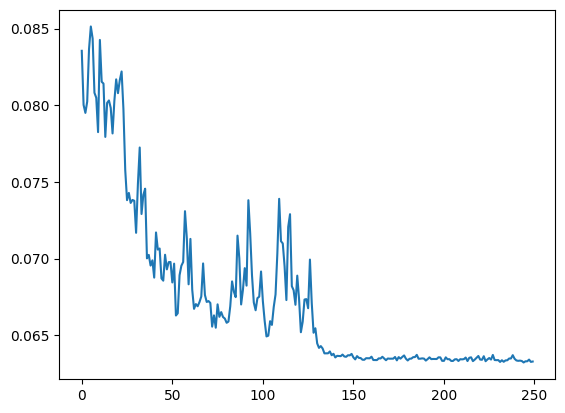

In [25]:
plt.plot([result["train_loss"] for result in results], label="train loss")